In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
path = "/Users/kshitij1/Documents/GitHub/Using-Twitter-for-Elections-Analysis/Media Bias/Sentiments"
files = os.listdir(path)

In [14]:
def helper(party,channel,method):
    fname = path + "/" + channel + "_" + party + "_" + method + ".npy"
    data = np.load(fname)
    return data

In [15]:
news = ["ndtv","CNNnews18","republic","IndiaToday","ZeeNewsEnglish"]
parties = ["bjp","bsp","samajwadi","aap","inc"]

In [16]:
df_media_1 = pd.DataFrame(index = news, columns = ['bjp Positive count',
        'bjp Negative count',
        'bjp Neutral count',
        'bjp Total count',
        'inc Positive count',
        'inc Negative count',
        'inc Neutral count',
        'inc Total count',
        'aap Positive count',
        'aap Negative count',
        'aap Neutral count',
        'aap Total count',
        'samajwadi Positive count',
        'samajwadi Negative count',
        'samajwadi Neutral count',
        'samajwadi Total count',
        'bsp Positive count',
        'bsp Negative count',
        'bsp Neutral count',
        'bsp Total count',
        
        'bjp Positive Sum',
        'bjp Negative Sum',
        'bjp Total Sum',
        'inc Positive Sum',
        'inc Negative Sum',
        'inc Total Sum',
        'aap Positive Sum',
        'aap Negative Sum',
        'aap Total Sum',
        'samajwadi Positive Sum',
        'samajwadi Negative Sum',
        'samajwadi Total Sum',
        'bsp Positive Sum',
        'bsp Negative Sum',
        'bsp Total Sum',
        ])

df_media_2 = pd.DataFrame(index = news, columns = ['bjp Positive count',
        'bjp Negative count',
        'bjp Neutral count',
        'bjp Total count',
        'inc Positive count',
        'inc Negative count',
        'inc Neutral count',
        'inc Total count',
        'aap Positive count',
        'aap Negative count',
        'aap Neutral count',
        'aap Total count',
        'samajwadi Positive count',
        'samajwadi Negative count',
        'samajwadi Neutral count',
        'samajwadi Total count',
        'bsp Positive count',
        'bsp Negative count',
        'bsp Neutral count',
        'bsp Total count',
        
        'bjp Positive Sum',
        'bjp Negative Sum',
        'bjp Total Sum',
        'inc Positive Sum',
        'inc Negative Sum',
        'inc Total Sum',
        'aap Positive Sum',
        'aap Negative Sum',
        'aap Total Sum',
        'samajwadi Positive Sum',
        'samajwadi Negative Sum',
        'samajwadi Total Sum',
        'bsp Positive Sum',
        'bsp Negative Sum',
        'bsp Total Sum',
        ])

df_media_1.fillna(0.0, inplace = True)
df_media_2.fillna(0.0, inplace = True)

In [17]:
for channel in news:
    for party in parties:
        polarity = helper(party,channel,"polarity")
        subjectivity = helper(party,channel,"subjectivity")

        temp_pos_1 = 0
        temp_neg_1 = 0

        temp_pos_2 = 0
        temp_neg_2 = 0

        for tweet in range(0,len(polarity)):
            if polarity[tweet]>=0:
                df_media_1.at[channel,party + " Positive count"] += 1
                df_media_1.at[channel,party + " Positive Sum"] += polarity[tweet]
                temp_pos_1 += polarity[tweet]
            else:
                df_media_1.at[channel,party + " Negative count"] += 1
                df_media_1.at[channel,party + " Negative Sum"] += polarity[tweet]
                # df_media_1[party + " Negative Sum"][channel] += polarity[tweet]
                temp_neg_1 += polarity[tweet]

            if polarity[tweet]>=0:
                df_media_2.at[channel,party + " Positive count"] += 1
                df_media_2.at[channel,party + " Positive Sum"] += polarity[tweet]*subjectivity[tweet]
                temp_pos_2 += polarity[tweet]*subjectivity[tweet]
            else:
                df_media_2.at[channel,party + " Negative count"] += 1
                df_media_2.at[channel,party + " Negative Sum"] += polarity[tweet]*subjectivity[tweet]
                temp_neg_2 += polarity[tweet]*subjectivity[tweet]
        # print(temp_pos)
        # print(temp_neg)
        df_media_1.at[channel,party + " Positive Sum"] = temp_pos_1
        df_media_1.at[channel,party + " Negative Sum"] = temp_neg_1
        df_media_1.at[channel,party + " Total Sum"] = temp_neg_1+temp_pos_1
        df_media_1.at[channel,party + " Total count"] = len(polarity)

        df_media_2.at[channel,party + " Positive Sum"] = temp_pos_2
        df_media_2.at[channel,party + " Negative Sum"] = temp_neg_2
        df_media_2.at[channel,party + " Total Sum"] = temp_neg_2+temp_pos_2
        df_media_2.at[channel,party + " Total count"] = len(polarity)


In [20]:
df_media_1.to_csv("/Users/kshitij1/Documents/GitHub/Using-Twitter-for-Elections-Analysis/Media Bias/Sentiments/media_1.csv")
df_media_2.to_csv("/Users/kshitij1/Documents/GitHub/Using-Twitter-for-Elections-Analysis/Media Bias/Sentiments/media_2.csv")

In [19]:
df_media_2

,bjp Positive count,bjp Negative count,bjp Neutral count,bjp Total count,inc Positive count,inc Negative count,inc Neutral count,inc Total count,aap Positive count,aap Negative count,...,inc Total Sum,aap Positive Sum,aap Negative Sum,aap Total Sum,samajwadi Positive Sum,samajwadi Negative Sum,samajwadi Total Sum,bsp Positive Sum,bsp Negative Sum,bsp Total Sum
ndtv,62.0,14.0,0.0,76.0,72.0,4.0,0.0,76.0,35.0,0.0,...,3.830476,3.308864,0.000000,3.308864,0.204545,0.000000,0.204545,0.068182,0.000000,0.068182
CNNnews18,114.0,19.0,0.0,133.0,81.0,14.0,0.0,95.0,16.0,4.0,...,4.038047,0.371111,-0.280562,0.090549,0.932264,-0.293177,0.639086,0.040000,-0.003750,0.036250
republic,199.0,22.0,0.0,221.0,148.0,24.0,0.0,172.0,51.0,11.0,...,-3.145402,3.462349,-1.749375,1.712974,1.170283,-0.150000,1.020283,0.060000,-1.181875,-1.121875
IndiaToday,156.0,18.0,0.0,174.0,115.0,8.0,0.0,123.0,30.0,4.0,...,4.153962,1.462786,-1.240000,0.222786,0.121667,-0.106389,0.015278,0.112500,0.000000,0.112500
ZeeNewsEnglish,46.0,6.0,0.0,52.0,37.0,1.0,0.0,38.0,35.0,3.0,...,1.095833,3.525975,-0.874167,2.651809,0.000000,0.000000,0.000000,0.083333,-0.110833,-0.027500


In [21]:
import matplotlib.pyplot as plt

In [84]:
def piechart(channel,df):
    # Total Count
    labels = parties
    sizes = [df.at[channel,party + " Total count"] for party in parties]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',)
    #Add legend
    plt.title(channel)

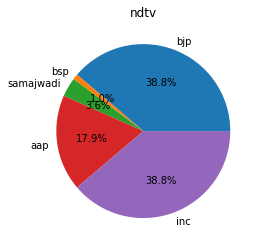

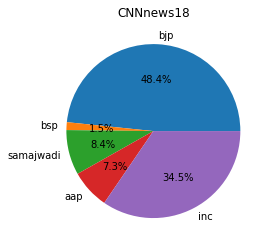

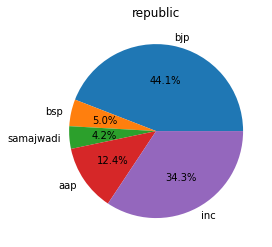

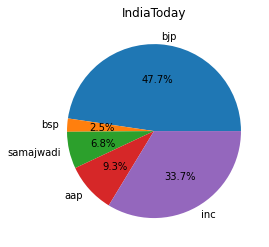

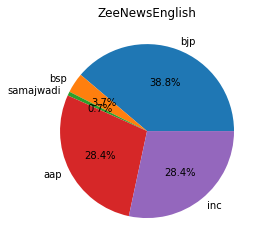

In [90]:
for channel in news:
    piechart(channel,df_media_1)
    plt.savefig(f"Plots/Coverage/{channel}.png",dpi=1000)
    plt.show()

In [97]:
import seaborn as sns
sns.set_theme()

In [98]:
def bar_chart_1(df,channel):
    pos_labels = []
    neg_labels = []
    xlabel = parties
    for party in parties:
        pos_labels.append(df.at[channel,party + " Positive count"])
        neg_labels.append(df.at[channel,party + " Negative count"])
    x = np.arange(len(xlabel))  # the label locations
    plt.bar(x-0.15, pos_labels, width=0.2, color='b', align='center', label='Positive')
    plt.bar(x+0.15, neg_labels, width=0.2, color='r', align='center', label='Negative')

    plt.ylabel('Count')
    plt.xlabel('Parties')
    plt.title(channel)

    plt.xticks(x, xlabel)
    plt.legend()

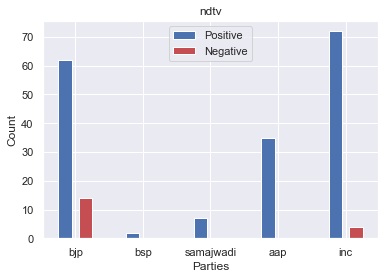

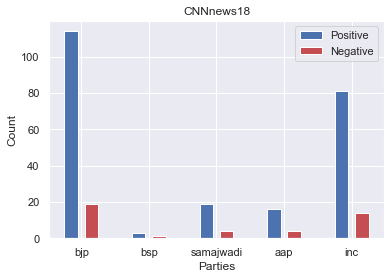

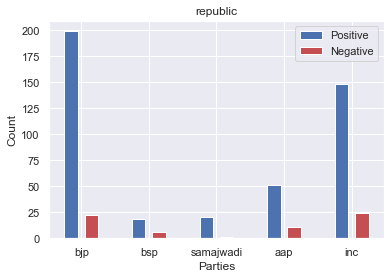

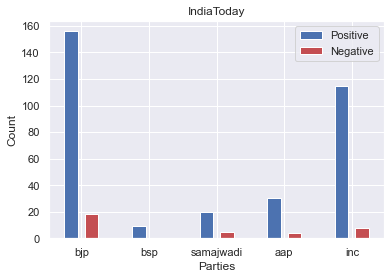

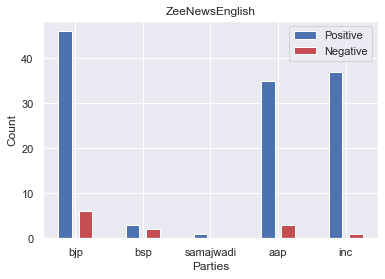

In [99]:
for channel in news:
    bar_chart_1(df_media_1,channel)
    plt.savefig(f"Plots/Structural/{channel}_count.png",dpi=1000)
    plt.show()

In [100]:
def bar_chart(df,channel):
    pos_labels = []
    neg_labels = []
    xlabel = parties
    for party in parties:
        pos_labels.append(df.at[channel,party + " Positive Sum"])
        neg_labels.append(df.at[channel,party + " Negative Sum"])
    neg_labels = [x*-1 for x in neg_labels]
    x = np.arange(len(xlabel))  # the label locations
    plt.bar(x-0.15, pos_labels, width=0.2, color='b', align='center', label='Positive')
    plt.bar(x+0.15, neg_labels, width=0.2, color='r', align='center', label='Negative')

    plt.ylabel('Sum of Sentiments')
    plt.xlabel('Parties')
    plt.title(channel)

    plt.xticks(x, xlabel)
    plt.legend()

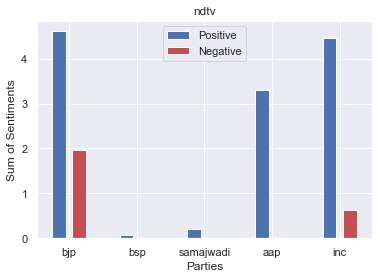

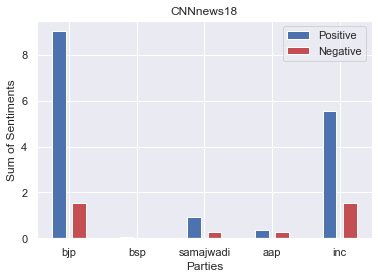

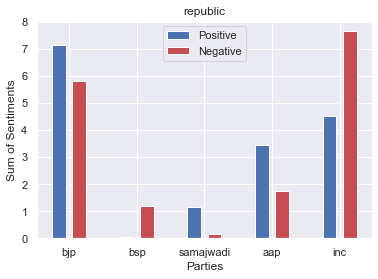

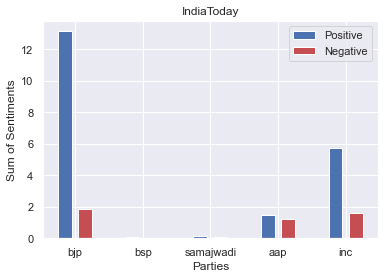

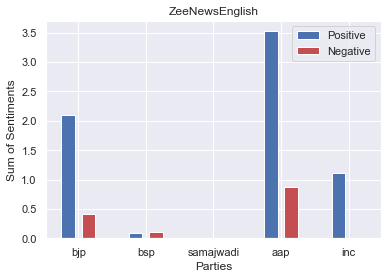

In [101]:
for channel in news:
    bar_chart(df_media_2,channel)
    plt.savefig(f"Plots/Structural/{channel}_sum.png",dpi=1000)
    plt.show()